No Skill PR AUC: 0.007


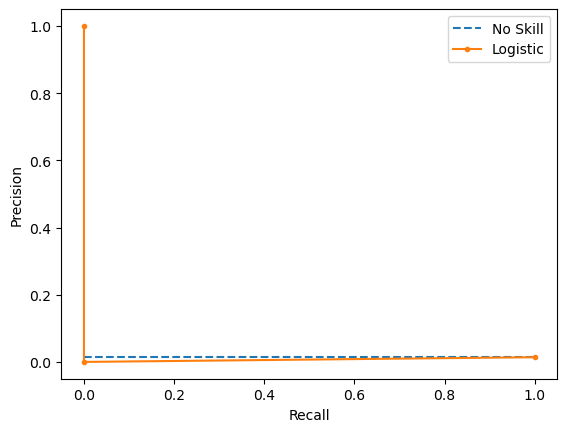

Logistic PR AUC: 0.007


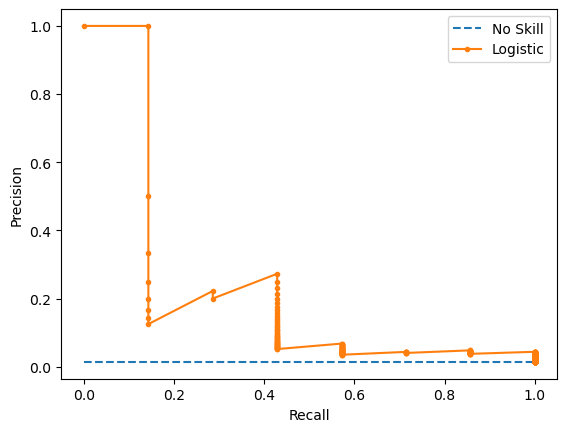

In [1]:

from __future__ import print_function
import os
import numpy as np

# pr curve and pr auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(test_y[test_y==1]) / len(test_y)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(testy, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()

# generate 2 class dataset(1-d) imabalnced: c1: 0.99*1000=990, C2= 0.01*1000:10, default 20 features
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# split into train/test sets with same class ratio, test_size: of total
#  stratify:yes:StratifiedKFold preserves the class ratios (approximately 1 / 10) in both train and test dataset.
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
##is a classifier that makes predictions using simple rules.
#This classifier is useful as a simple baseline to compare with other (real) classifiers.
# stratified”: generates predictions by respecting the training set’s class distribution.
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
# Nsamp x 2( for two classes)
yhat = model.predict_proba(testX)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
# testy:True binary labels,Estimated probabilities
# the label of the positive class. When pos_label=None, if y_true is in {0, 1}, pos_label is set to 1
# ndarray of shape (n_thresholds + 1,)
precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
plot_pr_curve(testy, naive_probs)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
model_probs1 = yhat[:, 1]
# calculate the precision-recall auc( as you change threshold, P, R will change)
precision1, recall1, _ = precision_recall_curve(testy, model_probs1)
auc_score1 = auc(recall1, precision1)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(testy, model_probs1)
#*****************************

#code for k fold cross validation for imabalnced classes
